In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools
import numpy as np
import seaborn as sns

In [11]:
# # Load dataset
# df = pd.read_csv('./diabetes_ds.csv')
# df.dropna(inplace=True)
# # Filter out patients who are predicted to have diabetes
# df_filtered = df[~df['CLASS'].str.contains('P', na=False)]

# # Create feature matrix and target vector
# x = df_filtered.iloc[:, 3:13]
# y = df_filtered['CLASS']
# y = y.map({'N': 0, 'Y': 1})  # Encode target variable

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Standardize the feature values
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/Users/jonathanpoffenberger/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8658940397350994
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.55      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



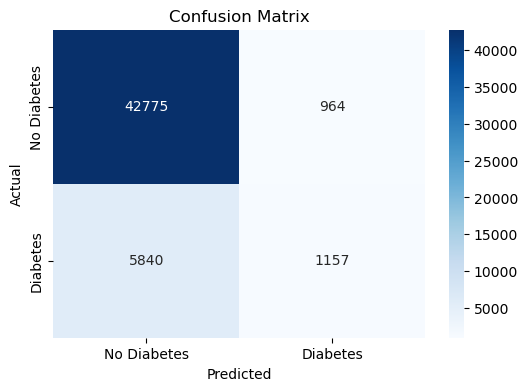

In [15]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Epoch 1/50


/Users/jonathanpoffenberger/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10148/10148 ━━━━━━━━━━━━━━━━━━━━ 7s 636us/step - accuracy: 0.8547 - loss: 0.3872 - val_accuracy: 0.8641 - val_loss: 0.3397
Epoch 2/50
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 6s 635us/step - accuracy: 0.8638 - loss: 0.3361 - val_accuracy: 0.8641 - val_loss: 0.3297
Epoch 3/50
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 6s 607us/step - accuracy: 0.8640 - loss: 0.3272 - val_accuracy: 0.8633 - val_loss: 0.3237
Epoch 4/50
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 6s 607us/step - accuracy: 0.8644 - loss: 0.3259 - val_accuracy: 0.8650 - val_loss: 0.3189
Epoch 5/50
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 6s 594us/step - accuracy: 0.8649 - loss: 0.3265 - val_accuracy: 0.8661 - val_loss: 0.3171
Epoch 6/50
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 6s 583us/step - accuracy: 0.8650 - loss: 0.3229 - val_accuracy: 0.8663 - val_loss: 0.3173
Epoch 7/50
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 6s 584us/step - accuracy: 0.8650 - loss: 0.3218 - val_accuracy: 0.8653 - val_loss: 0.3242
Epoch 8/50
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 6s 578us/step - accuracy: 0.8

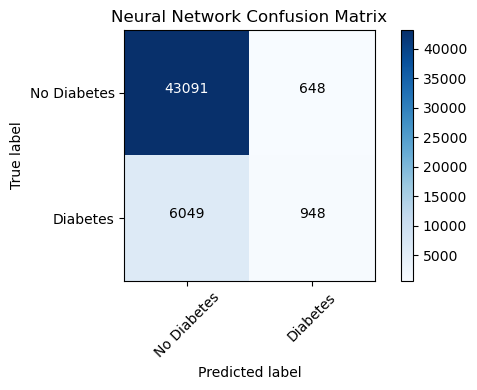

In [16]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='tanh')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")


print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))
plt.figure(figsize=(6,4))
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.imshow(cm_nn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Neural Network Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['No Diabetes', 'Diabetes'], rotation=45)
plt.yticks(tick_marks, ['No Diabetes', 'Diabetes'])
thresh = cm_nn.max() / 2.
for i, j in itertools.product(range(cm_nn.shape[0]), range(cm_nn.shape[1])):
    plt.text(j, i, format(cm_nn[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_nn[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

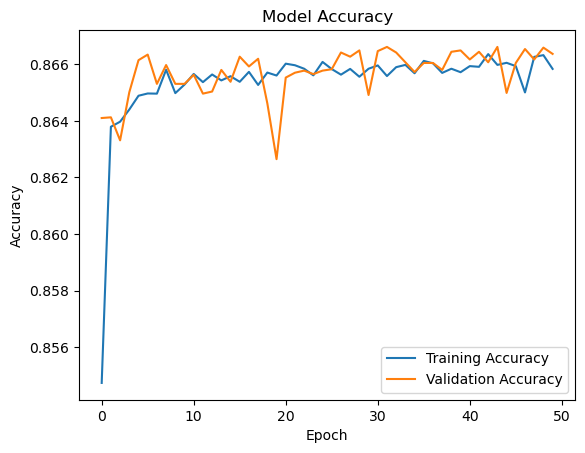

In [17]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()